![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Análisis de sentimientos y técnicas de NLP

En este taller podrán poner en práctica sus conocimientos sobre las diferentes técnicas para el procesamiento de lenguaje natural. El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción sentimientos de viajeros en Twitter

En este taller se usará el conjunto de datos de sentimientos sobre distintas aerolíneas de EE.UU. provenientes de Twitter. Cada observación contiene si el sentimiento de los tweets es positivo, neutral o negativo teniendo en cuenta distintas variables como aerolínea y las razones de los sentimientos negativos (como "retraso en el vuelo" o "servicio grosero"). El objetivo es predecir el sentimiento asociado a cada tweet. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/crowdflower/twitter-airline-sentiment).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# Lectura de la información de archivo .zip
tweets = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Tweets.zip', index_col=0)

# Visualización dataset
tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
# Impresión tamaño del cojunto de datos
tweets.shape

(14640, 14)

### Análisis descriptivo

In [5]:
# Cuenta de tweets por cada sentimiento
tweets['airline_sentiment'].value_counts()

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

In [6]:
# Cuenta de tweets por cada aerolínea
tweets['airline'].value_counts()

airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: count, dtype: int64

<Axes: title={'center': 'Sentimientos por aerolínea'}, xlabel='airline'>

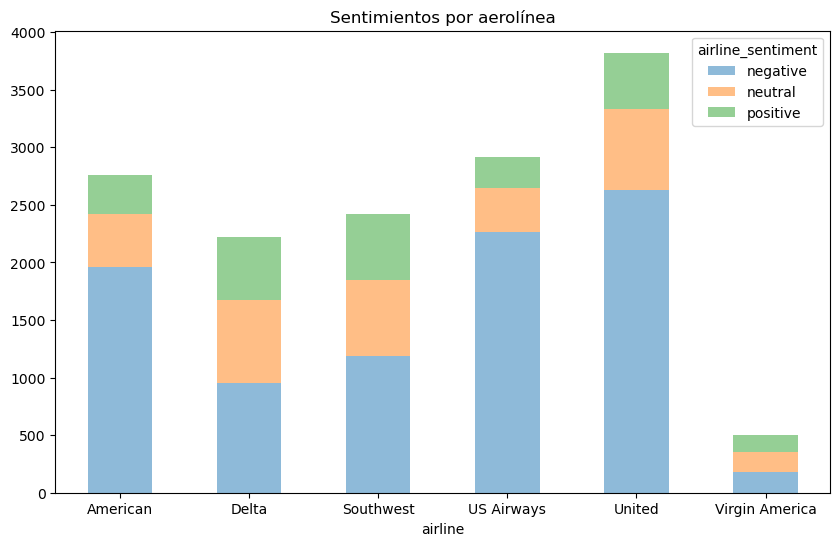

In [7]:
# Plot con cuenta de tweets por cada aerolínea y sentimiento
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentimientos por aerolínea")

### Librerías y Variables de interés y predicción

In [8]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

In [9]:
# Separación de variables predictoras (X) y de variable de interés (y)
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [10]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 1 - Uso de CountVectorizer

En la celda 1 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [11]:
# Celda 1

# Crear un objeto Countvectorizador
vectorizador = CountVectorizer()

# Ajustar y transformar los datos de entrenamiento
X_train_vectorizado = vectorizador.fit_transform(X_train)

# Transformar los datos de prueba
X_test_vectorizado = vectorizador.transform(X_test)

# Crear un modelo Random Forest
rf_cv_modelo = RandomForestClassifier(n_estimators=100, random_state=42)
#rf_model = RandomForestClassifier()


# Entrenar el modelo
rf_cv_modelo.fit(X_train_vectorizado, y_train)

# Predecir el sentimiento en los datos de prueba
y_pred = rf_cv_modelo.predict(X_test_vectorizado)

# Calcular el accuracy
rf_cv_accuracy = accuracy_score(y_test, y_pred)

print("Precisión del modelo Random Forest con CountVectorizer:", rf_cv_accuracy)


Precisión del modelo Random Forest con CountVectorizer: 0.7698675496688742


### Punto 2 - Eliminación de Stopwords

En la celda 2 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **eliminen stopwords** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [12]:
# Celda 2

# Crear un objeto CountVectorizer con eliminación de stopwords idioma inglés
vectorizador = CountVectorizer(stop_words='english')

# Ajustar y transformar los datos de entrenamiento
X_train_vectorizado = vectorizador.fit_transform(X_train)

# Transformar los datos de prueba
X_test_vectorizado = vectorizador.transform(X_test)

# Crear un modelo Random Forest
rf_sw_modelo = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
rf_sw_modelo.fit(X_train_vectorizado, y_train)

# Predecir el sentimiento en los datos de prueba
y_pred = rf_sw_modelo.predict(X_test_vectorizado)

# Calcular el accuracy
rf_sw_accuracy = accuracy_score(y_test, y_pred)

print("Precisión del modelo Random Forest con Stopwords:", rf_sw_accuracy)


Precisión del modelo Random Forest con Stopwords: 0.761796357615894


### Punto 3 - Lematización con verbos

En la celda 3 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [13]:
# Celda 3

# Función para lematización con verbos
def lemmatizar_con_verbos(text):
    lemmatizer = WordNetLemmatizer()
    lemmatizado_tokens = [lemmatizer.lemmatize(word, pos='v') for word in text.split()]
    return ' '.join(lemmatizado_tokens)

# Aplicar lematización con verbos a los datos de entrenamiento
X_train_lemmatizado = [lemmatizar_con_verbos(text) for text in X_train]

# Crear el vectorizador CountVectorizer
vectorizer = CountVectorizer()

# Ajustar y transformar los datos de entrenamiento
X_train_vectorizado = vectorizer.fit_transform(X_train_lemmatizado)

# Entrenar el modelo
rf_lv_modelo = RandomForestClassifier()
rf_lv_modelo.fit(X_train_vectorizado, y_train)

# Aplicar lematización con verbos a los datos de prueba
X_test_lemmatizado = [lemmatizar_con_verbos(text) for text in X_test]

# Transformar los datos de prueba
X_test_vectorizado = vectorizer.transform(X_test_lemmatizado)

# Predecir los datos de prueba
y_pred = rf_lv_modelo.predict(X_test_vectorizado)

# Calcular la precisión en los datos de prueba
rf_lv_accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo Random Forest con Lemmatizar con Verbos:", rf_lv_accuracy)


Precisión del modelo Random Forest con Lemmatizar con Verbos: 0.7721440397350994


### Punto 4 - Multiples técnicas

En la celda 4 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer, eliminen stopwords, lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [14]:
# Celda 4

# Celda 4
# Función para lematizar el texto con verbos
def lemmatizar_con_verbos(text):
    lemmatizar = WordNetLemmatizer()
    lemmatizado_tokens = [lemmatizar.lemmatize(word, pos='v') for word in text.split()]
    return ' '.join(lemmatizado_tokens)


# Aplicar lematización con verbos a los datos de entrenamiento
X_train_lemmatizado = [lemmatizar_con_verbos(text) for text in X_train]

# Crear el vectorizador CountVectorizer
vectorizar = CountVectorizer(lowercase=False, strip_accents='ascii', stop_words='english')

# Ajustar y transformar los datos de entrenamiento
X_train_vectorizado = vectorizar.fit_transform(X_train_lemmatizado)

# Entrenar el modelo
rf_lvs_modelo = RandomForestClassifier(n_estimators=100, random_state=42)
rf_lvs_modelo.fit(X_train_vectorizado, y_train)

# Aplicar lematización con verbos a los datos de prueba
X_test_lemmatizado = [lemmatizar_con_verbos(text) for text in X_test]

# Transformar los datos de prueba
X_test_vectorizado = vectorizar.transform(X_test_lemmatizado)

# Predecir los datos de prueba
y_pred = rf_lvs_modelo.predict(X_test_vectorizado)

# Calcular la precisión en los datos de prueba
rf_lvs_accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo Random Forest con múltiples técnicas:", rf_lvs_accuracy)


Precisión del modelo Random Forest con múltiples técnicas: 0.7684188741721855


### Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos (random forest) y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

Precisión del modelo Random Forest con CountVectorizer: 0.7699
Precisión del modelo Random Forest con Stopwords: 0.7618
Precisión del modelo Random Forest con Lemmatización de Verbos: 0.7721
Precisión del modelo Random Forest con Múltiples Técnicas: 0.7684

El MEJOR modelo es 'Lemmatización de Verbos' con precisión -accuracy-: 0.7721.
El PEOR modelo es 'Stopwords' con precisión -accuracy-: 0.7618.



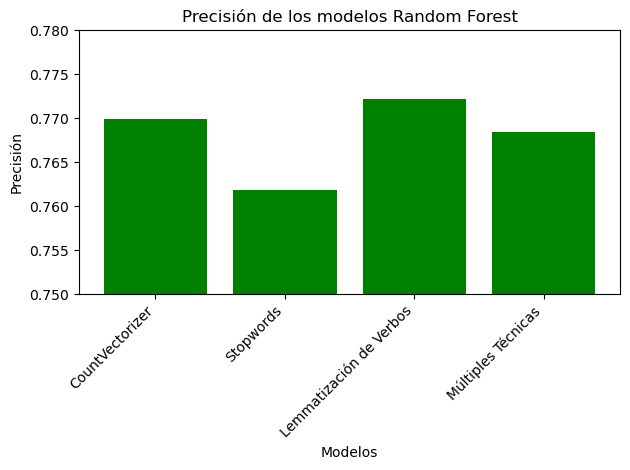

----------------------------------------------------------------------------------------------------
**Análisis y COmentarios:**
                                                            
El MEJOR modelo fue el que aplicó Random Forest con Lematización de Verbos (accuracy = 0.7744), lo cual
indica que normalizar las palabras a su forma base puede ser útil para este tipo de tarea. El modelo con
menor precisión -PEOR- fue Random Forest con Stopwords (accuracy = 0.7618), sugiriendo que algunas
palabras comunes pueden ser importantes para el análisis de los sentimientos en los tweets.
                                                            
El modelo con Múltiples Técnicas aunque combina varias tecnicas ocupó el tercer lugar de precisión, y al
parecer esto se debe a que al combinar Lematización y eliminación de Stopwords, posiblemente se eliminó
o alterò información importante para el análisis de sentimientos, lo cual pudo afectar la precisión.
---------------------------------------

In [19]:
# Celda 5

# Listar precisión -accuracy- de los modelos
precisions = {
    "CountVectorizer": rf_cv_accuracy,
    "Stopwords": rf_sw_accuracy,
    "Lemmatización de Verbos": rf_lv_accuracy,
    "Múltiples Técnicas": rf_lvs_accuracy
}

# Mostrar precisiones -accuracy- de los modelos
for model, accuracy in precisions.items():
    print(f"Precisión del modelo Random Forest con {model}: {accuracy:.4f}")

    
# Encontrar mejor y peor modelo
mejor_modelo = max(precisions, key=precisions.get)
peor_modelo = min(precisions, key=precisions.get)

print(f"\nEl MEJOR modelo es '{mejor_modelo}' con precisión -accuracy-: {precisions[mejor_modelo]:.4f}.")
print(f"El PEOR modelo es '{peor_modelo}' con precisión -accuracy-: {precisions[peor_modelo]:.4f}.\n")


# Crear gráfico de barras resultados
modelos = list(precisions.keys())
precisiones = list(precisions.values())

plt.bar(modelos, precisiones, color='green')
plt.xlabel("Modelos")
plt.ylabel("Precisión")
plt.title("Precisión de los modelos Random Forest")
plt.ylim(0.75, 0.78)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print('-' * 100)
print('**Análisis y COmentarios:**')
print(' ' * 60)
print('El MEJOR modelo fue el que aplicó Random Forest con Lematización de Verbos (accuracy = 0.7744), lo cual')
print('indica que normalizar las palabras a su forma base puede ser útil para este tipo de tarea. El modelo con')
print('menor precisión -PEOR- fue Random Forest con Stopwords (accuracy = 0.7618), sugiriendo que algunas')
print('palabras comunes pueden ser importantes para el análisis de los sentimientos en los tweets.')
print(' ' * 60)
print('El modelo con Múltiples Técnicas aunque combina varias tecnicas ocupó el tercer lugar de precisión, y al')
print('parecer esto se debe a que al combinar Lematización y eliminación de Stopwords, posiblemente se eliminó')
print('o alterò información importante para el análisis de sentimientos, lo cual pudo afectar la precisión.')
print('-' * 100)
